<a href="https://colab.research.google.com/github/chibokocl/chibokocl/blob/main/Flood_Risk_%7C_XGB%2BLGBM%2BCatboost_%7C_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id=toc></a>
<h1 style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;background-position: 0px 0px;
"><span style='color:white'><b> Flood Probability | XGB+LGBM+Catboost | Ensemble✨</b></span></h1>

<br>

<center>
    <img src="https://www.google.com/imgres?q=mafuriko%20rufiji&imgurl=https%3A%2F%2Fhabarileo.co.tz%2Fwp-content%2Fuploads%2F2024%2F04%2F86000201-c27d-4bcf-acf1-3112297dc8e7-780x470-3.jpg&imgrefurl=https%3A%2F%2Fhabarileo.co.tz%2Fbwawa-la-nyerere-lilizuia-mafuriko-rufiji%2F&docid=2BbWnsGk3QcTKM&tbnid=8eVXhgSb30t8sM&vet=12ahUKEwjSrc-6yp2GAxVQUaQEHQe6DG8QM3oECHwQAA..i&w=780&h=470&hcb=2&ved=2ahUKEwjSrc-6yp2GAxVQUaQEHQe6DG8QM3oECHwQAA"
         alt ="Flood"
         style='width: 60%;'>
    <figcaption>
            Source: <a href='https://www.google.com/imgres?q=mafuriko%20rufiji&imgurl=https%3A%2F%2Fhabarileo.co.tz%2Fwp-content%2Fuploads%2F2024%2F04%2F86000201-c27d-4bcf-acf1-3112297dc8e7-780x470-3.jpg&imgrefurl=https%3A%2F%2Fhabarileo.co.tz%2Fbwawa-la-nyerere-lilizuia-mafuriko-rufiji%2F&docid=2BbWnsGk3QcTKM&tbnid=8eVXhgSb30t8sM&vet=12ahUKEwjSrc-6yp2GAxVQUaQEHQe6DG8QM3oECHwQAA..i&w=780&h=470&hcb=2&ved=2ahUKEwjSrc-6yp2GAxVQUaQEHQe6DG8QM3oECHwQAA'> Habari Leo  | Fllod Image</a>
    </figcaption>
</center>

## 🎯 Objective
To test the applicability of ML models in predicting floods. To make a notebook reusable for similar tasks.


## 📁 Dataset
The dataset used in this notebook is the '<b>Regression with a Flood Prediction Dataset</b>' available in Kaggle. The Data was Uploaded for Playground Series - Season 4, Episode 5 Kaggle Competetion

<br>

<hr>

## Table of contents

- [1 | Importing Required Libraries & DataSource](#1)
   > - [Load & Inspect Data](#1.1)
   > - [Define Features & Encode Target](#1.2)


- [2 | Data Exploration](#2)
   > - [Computing Dimension of Dataset](#2.1)
   > - [Statistical Summary of Dataset](#2.2)
   > - [Dropping Attritbutes which doesn't imply any meaningful insights in our analysis](#2.3)
   > - [Checking if There's Any Duplicate Records](#2.4)
   > - [Computing Total No. of Missing Values and the Percentage of Missing Values](#2.5)
   > - [Computing Total No. of Missing Values and the Percentage of Missing Values](#2.6)
   
   
- [3 | Exploratory Data Analysis](#3)
   
   
- [4 | Feature Engineering](#4)

- [5 | Model Building](#5)
   > - [Baseline Model Building](#5.1)
   > - [HYpertuning Selected models](#5.2)
   > - [Voting Ensemble](#5.3)
   > - [Submission](#5.4)

<br>

<hr>

# Authorship:
- Adopted by Clement Chiboko
- **Github: https://github.com/chibokocl**

In [1]:
! pip install pandas
! pip install numpy
! pip install scipy
! pip install seaborn
! pip install altair
! pip install matplotlib
! pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='1'></a>
# 1 | Importing Required Libraries & DataSource

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [29]:
# Libraries for Data Manipulation.
import pandas as pd
import numpy as np

#Libraries for Data Visualization.
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)


# Library to overcome Warnings.
import warnings
warnings.filterwarnings('ignore')

# Libraries to perform Statistical Analysis.
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

from sklearn.cluster import KMeans

# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)

# Data Source
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/test.csv
/content/sample_submission.csv
/content/train.csv
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/default_configs.db
/content/.config/.last_opt_in_prompt.yaml
/content/.config/config_sentinel
/content/.config/logs/2024.05.17/13.36.16.038415.log
/content/.config/logs/2024.05.17/13.36.41.578276.log
/content/.config/logs/2024.05.17/13.37.14.902972.log
/content/.config/logs/2024.05.17/13.37.02.659444.log
/content/.config/logs/2024.05.17/13.37.14.268709.log
/content/.config/logs/2024.05.17/13.36.52.953916.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv


<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='1.1'></a>
# Load and Inspect Dataset

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [30]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [31]:
train_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


In [32]:
test_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [33]:
train_df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

<center><div style='background-color: #78D1E1; padding: 10px; border-radius: 5px;'>
  <h2 style='color: #03001C; text-align: center;'>⬆️ Back To Top</h2>
</div></center>
<h2 id='1.2'>Feature and Target Description</h2>
<div style="background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: cover; padding: 20px; border-radius: 10px; color: #fff; text-align: center; font-size: 1.5em;">Unveiling the Factors</div>
Features:


We have a comprehensive list of 20 features that influence flood probability. These factors encompass a wide range of natural, human-made, and management-related aspects, each playing a crucial role in assessing flood risk.


Monsoon Intensity
Topography and Drainage Patterns
River Management Practices
Deforestation
Urbanization and its Impact
Climate Change
Dams Quality and Effectiveness
Siltation and Waterbody Capacity
Agricultural Practices and Soil Erosion
Encroachments in Flood-Prone Areas
Disaster Preparedness and Response
Drainage Systems Efficiency
Coastal Vulnerability
Landslide Risk
Watershed Health and Management
Infrastructure Condition
Population Distribution and Density
Wetland Loss
Urban Planning Considerations
Political Factors and Decisions

Each of these features contributes to our understanding of flood dynamics and helps in predicting flood probability.


Target Variable:


Flood Probability: Our target variable is the heart of this analysis. It represents the likelihood of a flood occurring in a given area, influenced by the interplay of the features mentioned above. Flood probability is a critical metric for developing effective flood management strategies and mitigating potential risks.

By exploring and modeling these features, we aim to enhance our understanding of flood behavior and build robust predictive models. This knowledge will ultimately contribute to more resilient communities and better-informed disaster management practices.


<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='2'></a>
# 2 | Data Exploration

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='2.1'></a>
#### 2.1. Computing Dimension of Dataset

In [34]:
print("dataset shape: ",train_df.shape)

dataset shape:  (1117957, 22)


In [35]:
print("dataset shape: ",test_df.shape)

dataset shape:  (745305, 21)


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There is total **1117957 records** and **22 columns** availabe in the train_dataset.
* There is total **745305 records** and **21 columns** availabe in the test_dataset.

<a id='2.2'></a>
#### 2.2. Statistical Summary of Dataset

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [37]:
# Identify the data types of columns
column_data_types = train_df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 22 Numerical Columns in dataset
There are 0 Categorical Columns in dataset


<a id='2.3'></a>
#### 2.3. Dropping Attritbutes which doesn't imply any meaningful insights in our analysis.

In [38]:
# saving id to use for submission work at end
id = test_df['id']

In [39]:
cols = ["id"]
train_df.drop(columns=cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

<a id='2.4'></a>
#### 2.4. Checking if There's Any Duplicate Records.

In [40]:
print("Duplicates in Dataset: ",train_df.duplicated().sum())

Duplicates in Dataset:  0


<a id='2.5'></a>
#### 2.5. Computing Total No. of Missing Values and the Percentage of Missing Values

In [41]:
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
MonsoonIntensity,0,0.0
TopographyDrainage,0,0.0
RiverManagement,0,0.0
Deforestation,0,0.0
Urbanization,0,0.0
ClimateChange,0,0.0
DamsQuality,0,0.0
Siltation,0,0.0
AgriculturalPractices,0,0.0
Encroachments,0,0.0


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* None of the Attribute are having Missing Values.  

<a id='2.6'></a>
#### 2.6. Performing Descriptive Analysis

In [42]:
round(train_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.92,2.06,0.00,3.00,5.0,6.00,16.00
TopographyDrainage,1117957.0,4.93,2.09,0.00,3.00,5.0,6.00,18.00
RiverManagement,1117957.0,4.96,2.07,0.00,4.00,5.0,6.00,16.00
Deforestation,1117957.0,4.94,2.05,0.00,4.00,5.0,6.00,17.00
Urbanization,1117957.0,4.94,2.08,0.00,3.00,5.0,6.00,17.00
ClimateChange,1117957.0,4.93,2.06,0.00,3.00,5.0,6.00,17.00
DamsQuality,1117957.0,4.96,2.08,0.00,4.00,5.0,6.00,16.00
Siltation,1117957.0,4.93,2.07,0.00,3.00,5.0,6.00,16.00
AgriculturalPractices,1117957.0,4.94,2.07,0.00,3.00,5.0,6.00,16.00
Encroachments,1117957.0,4.95,2.08,0.00,4.00,5.0,6.00,18.00


In [43]:
round(test_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,745305.0,4.92,2.06,0.0,3.0,5.0,6.0,16.0
TopographyDrainage,745305.0,4.93,2.09,0.0,3.0,5.0,6.0,17.0
RiverManagement,745305.0,4.96,2.07,0.0,4.0,5.0,6.0,16.0
Deforestation,745305.0,4.95,2.05,0.0,4.0,5.0,6.0,17.0
Urbanization,745305.0,4.94,2.08,0.0,3.0,5.0,6.0,17.0
ClimateChange,745305.0,4.93,2.06,0.0,3.0,5.0,6.0,17.0
DamsQuality,745305.0,4.96,2.09,0.0,4.0,5.0,6.0,16.0
Siltation,745305.0,4.93,2.07,0.0,3.0,5.0,6.0,16.0
AgriculturalPractices,745305.0,4.95,2.07,0.0,3.0,5.0,6.0,16.0
Encroachments,745305.0,4.95,2.08,0.0,4.0,5.0,6.0,17.0


<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='3'></a>
# 3 | Exploratory Data Analysis (EDA)

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


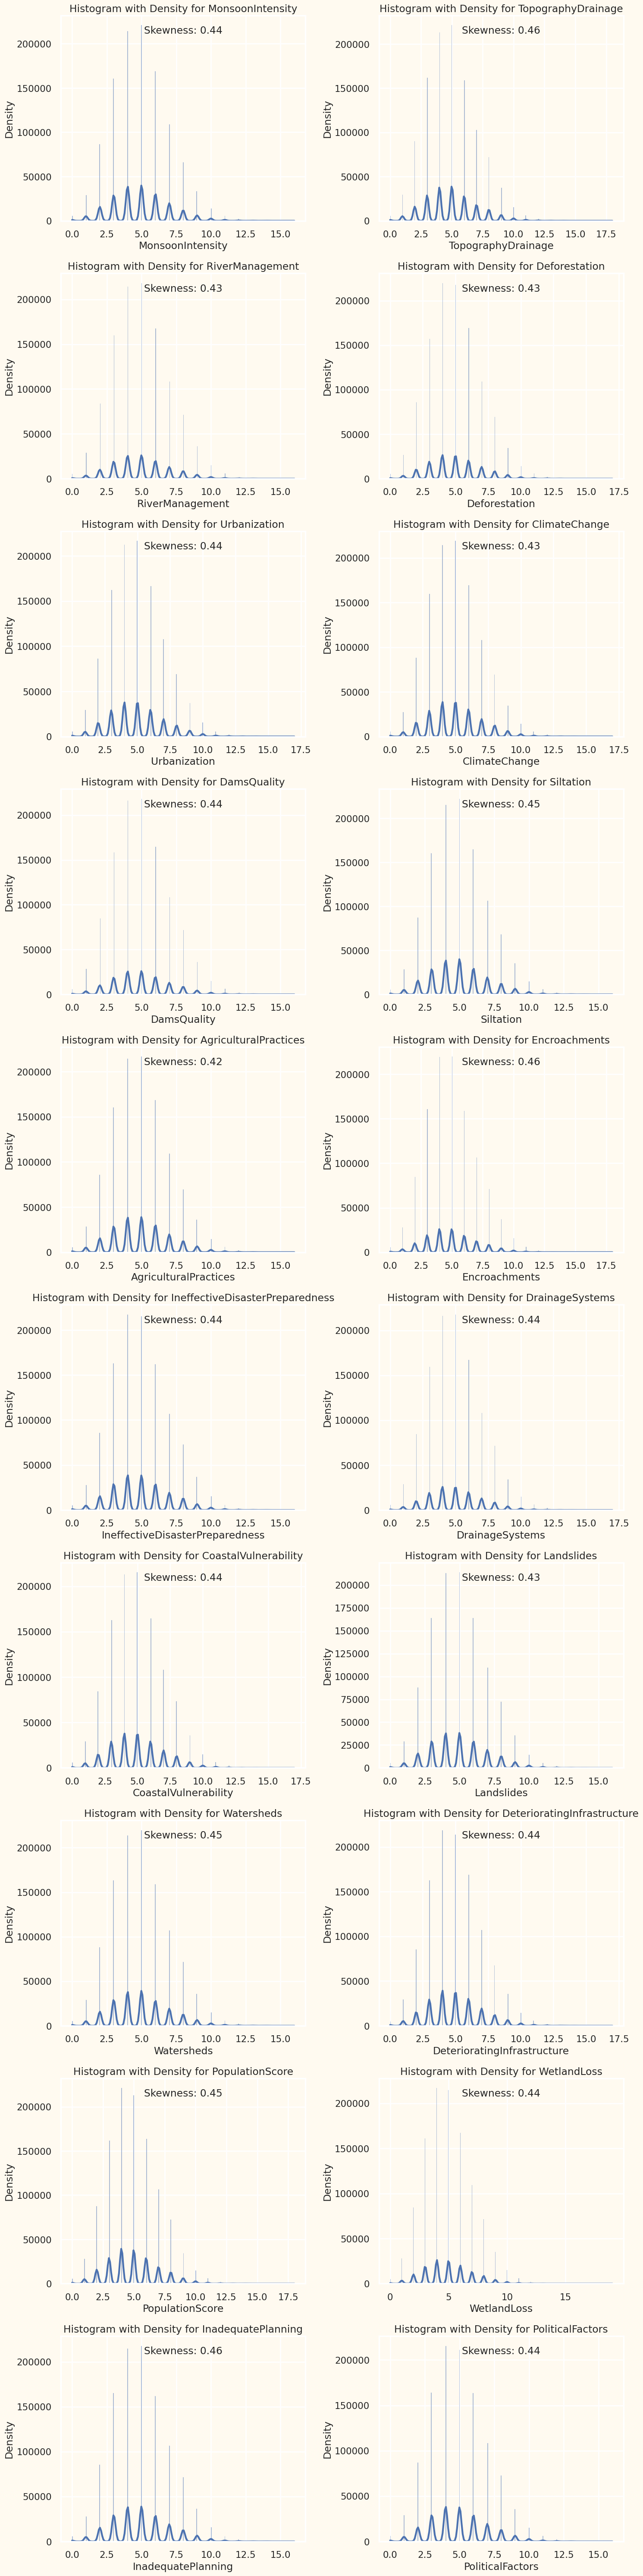

In [44]:
# Set the figure size and arrange plots horizontally in pairs
numerical_features = test_df.columns
num_plots = len(numerical_features)
num_rows = (num_plots + 1) // 2  # Ensure enough rows to accommodate all features
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 6*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the selected columns and create histograms with density
for i, col in enumerate(numerical_features):
    sns.histplot(data=train_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    # Calculate skewness
    skewness = skew(train_df[col].dropna())
    axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

# Remove any empty subplots if the number of features is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


- |Skewness| < 1: The distribution is approximately symmetric.
- |Skewness| > 1: The distribution is highly skewed.
- |Skewness| between 1 and 2: Moderately skewed distribution.

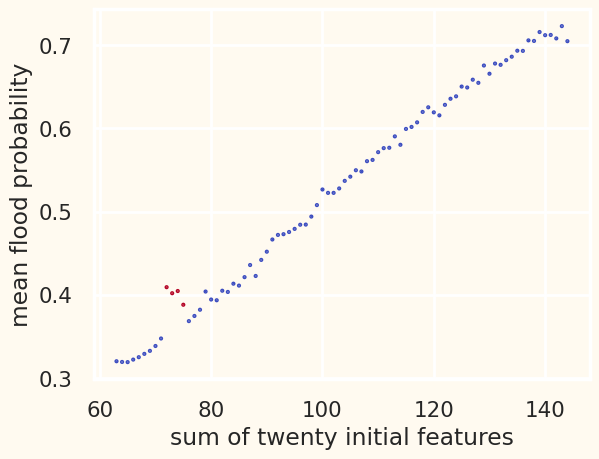

In [45]:
initial_features = list(test_df.columns)
temp = train_df.FloodProbability.groupby(train_df[initial_features].sum(axis=1)).mean()
plt.scatter(temp.index, temp, s=1, c=(temp.index.isin(np.arange(72, 76))), cmap='coolwarm')
plt.xlabel('sum of twenty initial features')
plt.ylabel('mean flood probability')
plt.show()

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='4'></a>
# 4 | Featutre Engineering

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [46]:
df = train_df.copy()
df = df.drop(['FloodProbability'],axis = 1)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
df = sm.add_constant(df.select_dtypes(include=[np.number]))
vif = pd.DataFrame()
vif["Variable"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif

,Variable,VIF
0,const,142.456543
1,MonsoonIntensity,1.001718
2,TopographyDrainage,1.002464
3,RiverManagement,1.002344
4,Deforestation,1.002477
5,Urbanization,1.003128
6,ClimateChange,1.002400
7,DamsQuality,1.002310
8,Siltation,1.002158
9,AgriculturalPractices,1.002531


In [48]:
highly_correlated_variable = []
for index,row in vif.iterrows():
    if row['VIF']>6.5:
        highly_correlated_variable.append(row['Variable'])
highly_correlated_variable.remove('const')
print(highly_correlated_variable)

[]


In [49]:
def generate_features(dataset):
    features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']


    dataset['mean_features'] = 0.1*dataset[features].mean(axis=1)
    dataset['std_features'] = dataset[features].std(axis=1)
    dataset['max_features'] = dataset[features].max(axis=1)
    dataset['min_features'] = dataset[features].min(axis=1)
    dataset['median_features'] = 0.1*dataset[features].median(axis=1)
    dataset['range_features'] = dataset['max_features'] - dataset['min_features']
    dataset['variance_features'] = dataset[features].var(axis=1)
    dataset['skewness_features'] = dataset[features].skew(axis=1)

    quartiles = dataset[features].quantile([0.25, 0.5, 0.75], axis=1)
    dataset['first_quartile'] = quartiles.loc[0.25]
    dataset['second_quartile'] = quartiles.loc[0.5]
    dataset['third_quartile'] = quartiles.loc[0.75]

    kurtosis_features = dataset[features].kurtosis(axis=1)
    dataset['kurtosis_features'] = kurtosis_features

    selected_columns = ['Urbanization', 'Deforestation', 'AgriculturalPractices', 'InadequatePlanning']
    dataset['Sum_Selected_Columns'] = dataset[selected_columns].sum(axis=1)

    dataset['Urbanization_Deforestation_Interaction'] = dataset['Urbanization'] * dataset['Deforestation']
    dataset['Urbanization_TopographyDrainage_Ratio'] = dataset['Urbanization'] / (dataset['TopographyDrainage'] + 1)

    dataset.drop(features, axis=1, inplace=True)

    return dataset

In [50]:
generate_features(train_df)

,FloodProbability,mean_features,std_features,max_features,min_features,median_features,range_features,variance_features,skewness_features,first_quartile,second_quartile,third_quartile,kurtosis_features,Sum_Selected_Columns,Urbanization_Deforestation_Interaction,Urbanization_TopographyDrainage_Ratio
0,0.445,0.470,1.750188,8,2,0.45,6,3.063158,0.577258,3.00,4.5,5.25,-0.521862,24,48,0.666667
1,0.450,0.470,2.296450,9,0,0.40,9,5.273684,0.148339,3.00,4.0,6.25,-0.358403,20,32,1.000000
2,0.530,0.495,1.932411,8,1,0.50,7,3.734211,-0.408083,3.00,5.0,6.25,-0.742415,17,21,0.500000
3,0.535,0.520,1.641565,8,2,0.50,6,2.694737,0.120566,4.00,5.0,6.25,-0.590749,22,20,0.800000
4,0.415,0.360,1.500877,6,1,0.30,5,2.252632,0.253227,2.75,3.0,5.00,-0.922261,16,24,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,0.495,0.495,2.543826,10,1,0.40,9,6.471053,0.616174,3.00,4.0,7.00,-0.289320,30,40,1.000000
1117953,0.480,0.480,2.419221,9,1,0.40,8,5.852632,0.606652,3.00,4.0,5.50,-0.530161,19,27,3.000000
1117954,0.485,0.490,1.970840,9,1,0.50,8,3.884211,0.383184,4.00,5.0,5.25,0.854564,15,24,1.500000
1117955,0.495,0.495,1.700619,8,2,0.50,6,2.892105,0.014803,3.75,5.0,6.00,-1.100009,24,35,1.250000


In [51]:
generate_features(test_df)

,mean_features,std_features,max_features,min_features,median_features,range_features,variance_features,skewness_features,first_quartile,second_quartile,third_quartile,kurtosis_features,Sum_Selected_Columns,Urbanization_Deforestation_Interaction,Urbanization_TopographyDrainage_Ratio
0,0.555,1.605091,8,3,0.55,5,2.576316,0.069366,4.00,5.5,7.00,-1.041033,23,30,0.857143
1,0.450,1.905670,9,1,0.40,8,3.631579,0.507005,4.00,4.0,5.00,0.630540,23,45,1.000000
2,0.450,2.259483,9,1,0.45,8,5.105263,0.304178,2.75,4.5,6.00,-0.836166,24,35,1.750000
3,0.460,1.602629,8,2,0.40,6,2.568421,0.480767,4.00,4.0,6.00,-0.135914,18,24,0.800000
4,0.460,1.602629,8,2,0.45,6,2.568421,0.225040,3.75,4.5,6.00,-0.319886,18,24,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,0.470,1.454575,8,1,0.50,7,2.115789,-0.328351,4.00,5.0,5.25,1.873119,19,15,1.000000
745301,0.445,2.089447,12,2,0.40,10,4.365789,2.674538,3.00,4.0,5.00,9.159246,26,48,0.800000
745302,0.600,2.339591,11,3,0.50,8,5.473684,1.041164,5.00,5.0,7.00,0.357118,20,25,0.625000
745303,0.535,1.954078,8,2,0.60,6,3.818421,-0.360800,3.75,6.0,7.00,-0.973613,19,15,0.625000


<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

# Correlation Matrix

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<Axes: title={'center': 'Correlation Plot'}>

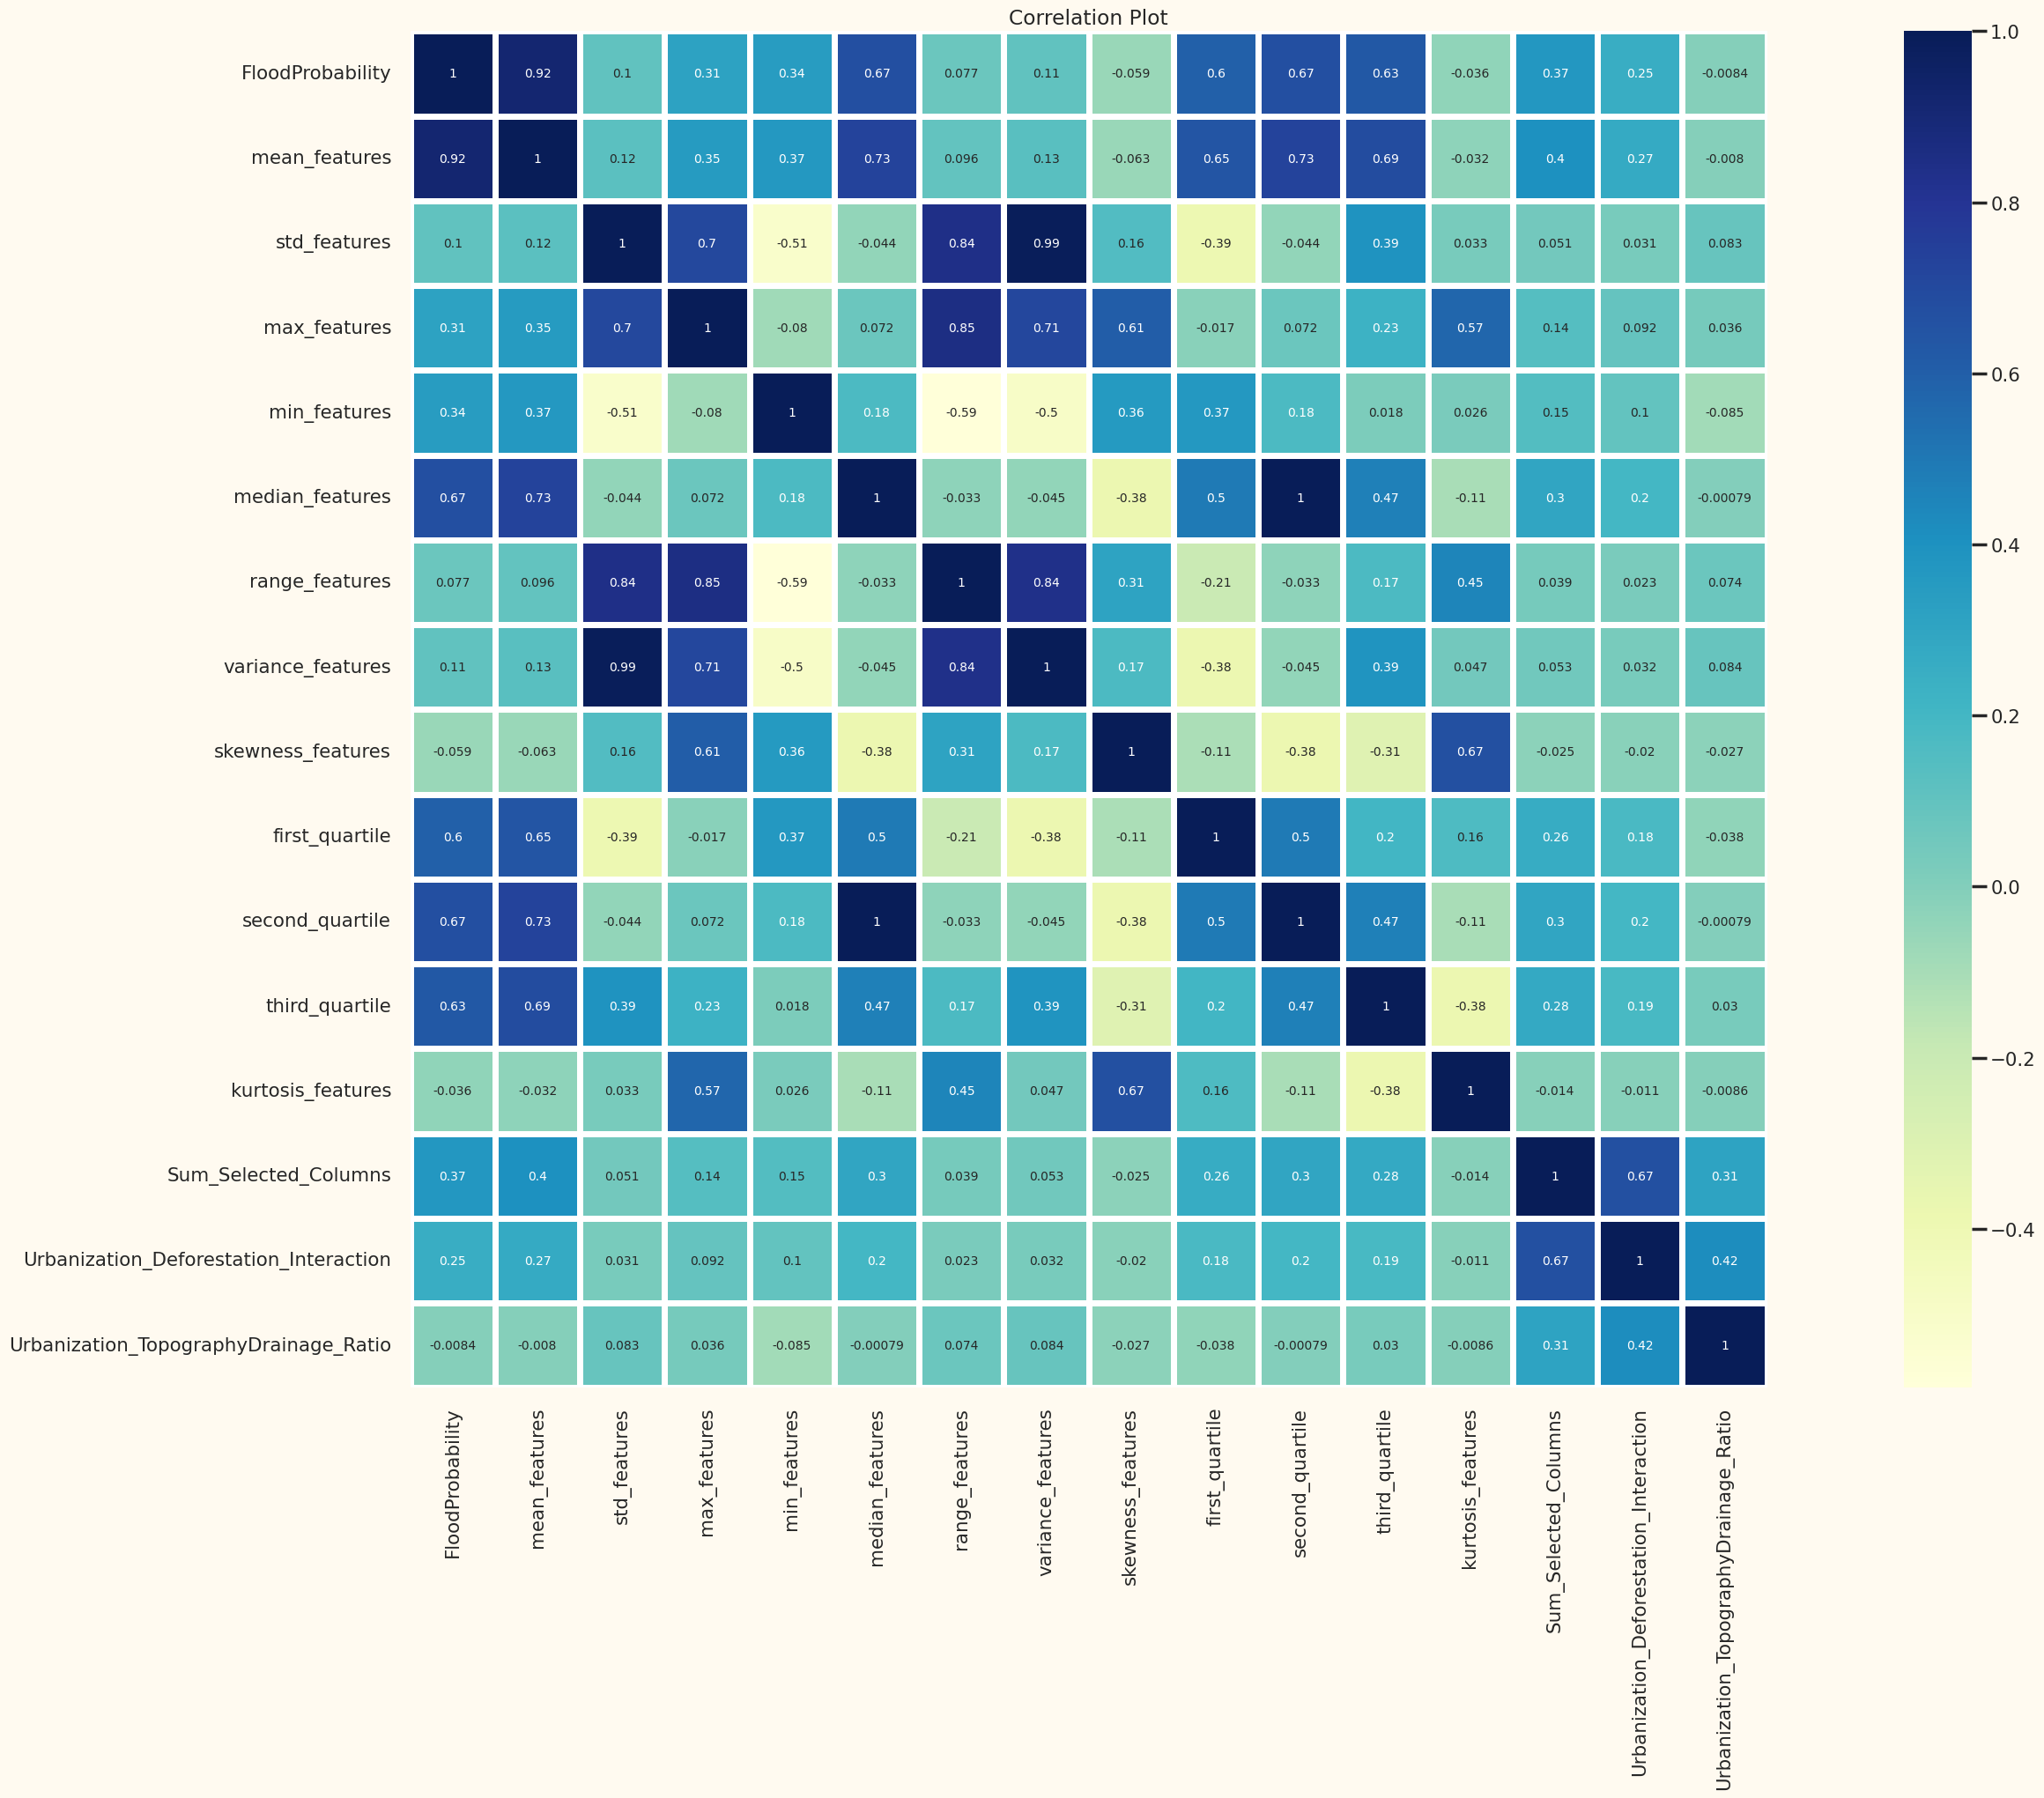

In [52]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(train_df.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [53]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")


Highly correlated features:
FloodProbability and mean_features
std_features and range_features
std_features and variance_features
max_features and range_features
median_features and second_quartile
range_features and variance_features


In [54]:
train_df.cov()['FloodProbability']

FloodProbability                          0.002604
mean_features                             0.001948
std_features                              0.001943
max_features                              0.020964
min_features                              0.014690
median_features                           0.001941
range_features                            0.006274
variance_features                         0.008743
skewness_features                        -0.001495
first_quartile                            0.018116
second_quartile                           0.019409
third_quartile                            0.021258
kurtosis_features                        -0.002172
Sum_Selected_Columns                      0.077061
Urbanization_Deforestation_Interaction    0.191038
Urbanization_TopographyDrainage_Ratio    -0.000290
Name: FloodProbability, dtype: float64

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

# Split the Data into Independent and Dependent Variable

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [55]:
x = train_df.drop(['FloodProbability'], axis=1)
y = train_df[['FloodProbability']]

In [56]:
from sklearn.feature_selection import mutual_info_regression

discrete_features = x.dtypes == int

def mi_score_maker(x,y,discrete_features):
    scores = mutual_info_regression(x,y,discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features':x.columns,
        'Scores':scores
    })
    df = df.sort_values(['Scores'],ascending=False).reset_index(drop=True)
    return df

In [57]:
mi_scores = mi_score_maker(x,y.astype('float64'),discrete_features)

mi_scores

,Features,Scores
0,mean_features,2.099914
1,skewness_features,1.135845
2,std_features,0.927171
3,variance_features,0.925902
4,kurtosis_features,0.586470
5,second_quartile,0.343609
6,median_features,0.343179
7,third_quartile,0.291854
8,first_quartile,0.260359
9,max_features,0.093526


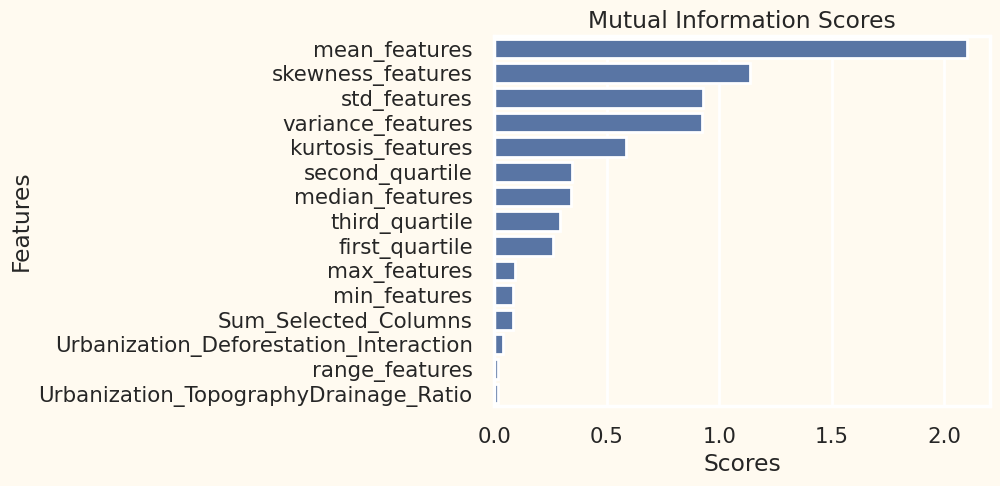

In [58]:
sns.barplot(x='Scores',y='Features',data=mi_scores)
plt.title("Mutual Information Scores")
plt.show()

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

# Feature Scaling

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = RobustScaler()
standardscl = StandardScaler()
minmax = MinMaxScaler()

In [60]:
x_scaled = minmax.fit_transform(x)

In [61]:
test_df_scaled = minmax.transform(test_df)

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

# Split the Data into Training and Test

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Split the Data into Training and Test (Scaled)

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [63]:
from sklearn.model_selection import train_test_split
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [66]:
! pip install lightgbm
! pip install optuna
! pip install collections
! pip install tqdm
! pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.0 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [67]:
# Machine learning algorithms
# Importing from scikit-learn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, SGDRegressor, BayesianRidge, PoissonRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# Importing from XGBoost
from xgboost import XGBRegressor

# Importing from LightGBM
from lightgbm import LGBMRegressor

# Importing from CatBoost
from catboost import CatBoostRegressor

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
import os
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold, cross_val_predict
#from scikeras.wrappers import KerasClassifier
from tqdm import tqdm


#for hypertuning
import optuna
from collections import Counter
from catboost import CatBoostError
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import KFold

# for model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='5'></a>
# 5 | Model Building

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='5.1'></a>
# Baseline Models

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [68]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def model_prediction_regression(model, x, y, n_splits=5, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    mse_scores = []
    mae_scores = []
    r2_scores = []  # Renamed to avoid conflict with the r2_score function

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mse_scores.append(mse)
        mae_scores.append(mae)
        r2_scores.append(r2)

    print("\n------------------------------------------------------------------------")
    print(f"Mean Squared Error of {model} model is:", np.mean(mse_scores))
    print(f"Mean Absolute Error of {model} model is:", np.mean(mae_scores))
    print(f"R² score of {model} model is:", np.mean(r2_scores))
    print("\n------------------------------------------------------------------------")


In [69]:
model_prediction_regression(LGBMRegressor(), x, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.146234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 15
[LightGBM] [Info] Start training from score 0.504480
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1441
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 15
[LightGBM] [Info] Start training from score 0.504511
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

In [70]:
model_prediction_regression(CatBoostRegressor(), x, y)

Streaming output truncated to the last 5000 lines.
11:	learn: 0.0219372	total: 1.74s	remaining: 2m 23s
12:	learn: 0.0213257	total: 1.88s	remaining: 2m 22s
13:	learn: 0.0208288	total: 2s	remaining: 2m 21s
14:	learn: 0.0204401	total: 2.13s	remaining: 2m 20s
15:	learn: 0.0201134	total: 2.27s	remaining: 2m 19s
16:	learn: 0.0198530	total: 2.41s	remaining: 2m 19s
17:	learn: 0.0196439	total: 2.53s	remaining: 2m 18s
18:	learn: 0.0194771	total: 2.66s	remaining: 2m 17s
19:	learn: 0.0193463	total: 2.79s	remaining: 2m 16s
20:	learn: 0.0192339	total: 2.91s	remaining: 2m 15s
21:	learn: 0.0191479	total: 3.03s	remaining: 2m 14s
22:	learn: 0.0190792	total: 3.22s	remaining: 2m 16s
23:	learn: 0.0190145	total: 3.45s	remaining: 2m 20s
24:	learn: 0.0189562	total: 3.67s	remaining: 2m 23s
25:	learn: 0.0189123	total: 3.91s	remaining: 2m 26s
26:	learn: 0.0188773	total: 4.13s	remaining: 2m 28s
27:	learn: 0.0188485	total: 4.38s	remaining: 2m 31s
28:	learn: 0.0188282	total: 4.6s	remaining: 2m 34s
29:	learn: 0.0188

In [71]:
model_prediction_regression(XGBRegressor(), x, y)


------------------------------------------------------------------------
Mean Squared Error of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model is: 0.0003416322531174708
Mean Absolute Error of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsa

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='5.2'></a>
# HyperTuning Selected Models

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


### Hypertuning XGboost

In [72]:
'''import optuna
from sklearn.model_selection import cross_validate

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 10)
    n_estimators = trial.suggest_int('n_estimators', 100, 2000)
    gamma = trial.suggest_float('gamma', 0, 1)
    reg_alpha = trial.suggest_float('reg_alpha', 0, 2)
    reg_lambda = trial.suggest_float('reg_lambda', 0, 2)
    min_child_weight = trial.suggest_int('min_child_weight', 0, 10)
    subsample = trial.suggest_float('subsample', 0, 1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0, 1)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1)

    print('Training the model with', x.shape[1], 'features')

    params = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'gamma': gamma,
              'reg_alpha': reg_alpha,
              'reg_lambda': reg_lambda,
              'max_depth': max_depth,
              'min_child_weight': min_child_weight,
              'subsample': subsample,
              'colsample_bytree': colsample_bytree}

    clf = XGBRegressor(**params)

    cv_results = cross_validate(clf, x, y, cv=5, scoring='r2')

    validation_score = np.mean(cv_results['test_score'])

    return validation_score

'''

"import optuna\nfrom sklearn.model_selection import cross_validate\n\ndef objective(trial):\n    max_depth = trial.suggest_int('max_depth', 3, 10)\n    n_estimators = trial.suggest_int('n_estimators', 100, 2000)\n    gamma = trial.suggest_float('gamma', 0, 1)\n    reg_alpha = trial.suggest_float('reg_alpha', 0, 2)\n    reg_lambda = trial.suggest_float('reg_lambda', 0, 2)\n    min_child_weight = trial.suggest_int('min_child_weight', 0, 10)\n    subsample = trial.suggest_float('subsample', 0, 1)\n    colsample_bytree = trial.suggest_float('colsample_bytree', 0, 1)\n    learning_rate = trial.suggest_float('learning_rate', 0.01, 1)\n\n    print('Training the model with', x.shape[1], 'features')\n\n    params = {'n_estimators': n_estimators,\n              'learning_rate': learning_rate,\n              'gamma': gamma,\n              'reg_alpha': reg_alpha,\n              'reg_lambda': reg_lambda,\n              'max_depth': max_depth,\n              'min_child_weight': min_child_weight,\n  

In [73]:
#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=100)

In [74]:
#best_params = study.best_params
#print("Best Hyperparameters:", best_params)

In [75]:
best_params = {'max_depth': 9, 'n_estimators': 913, 'gamma': 0.007424095823836917, 'reg_alpha': 0.2144593472679007, 'reg_lambda': 1.7404175052607878, 'min_child_weight': 0, 'subsample': 0.21959794108855646, 'colsample_bytree': 0.5971654266907475, 'learning_rate': 0.6343746303785935}

In [76]:
xgb_model = XGBRegressor(**best_params)
xgb_model.fit(x, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5971654266907475, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.007424095823836917,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.6343746303785935,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=913, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

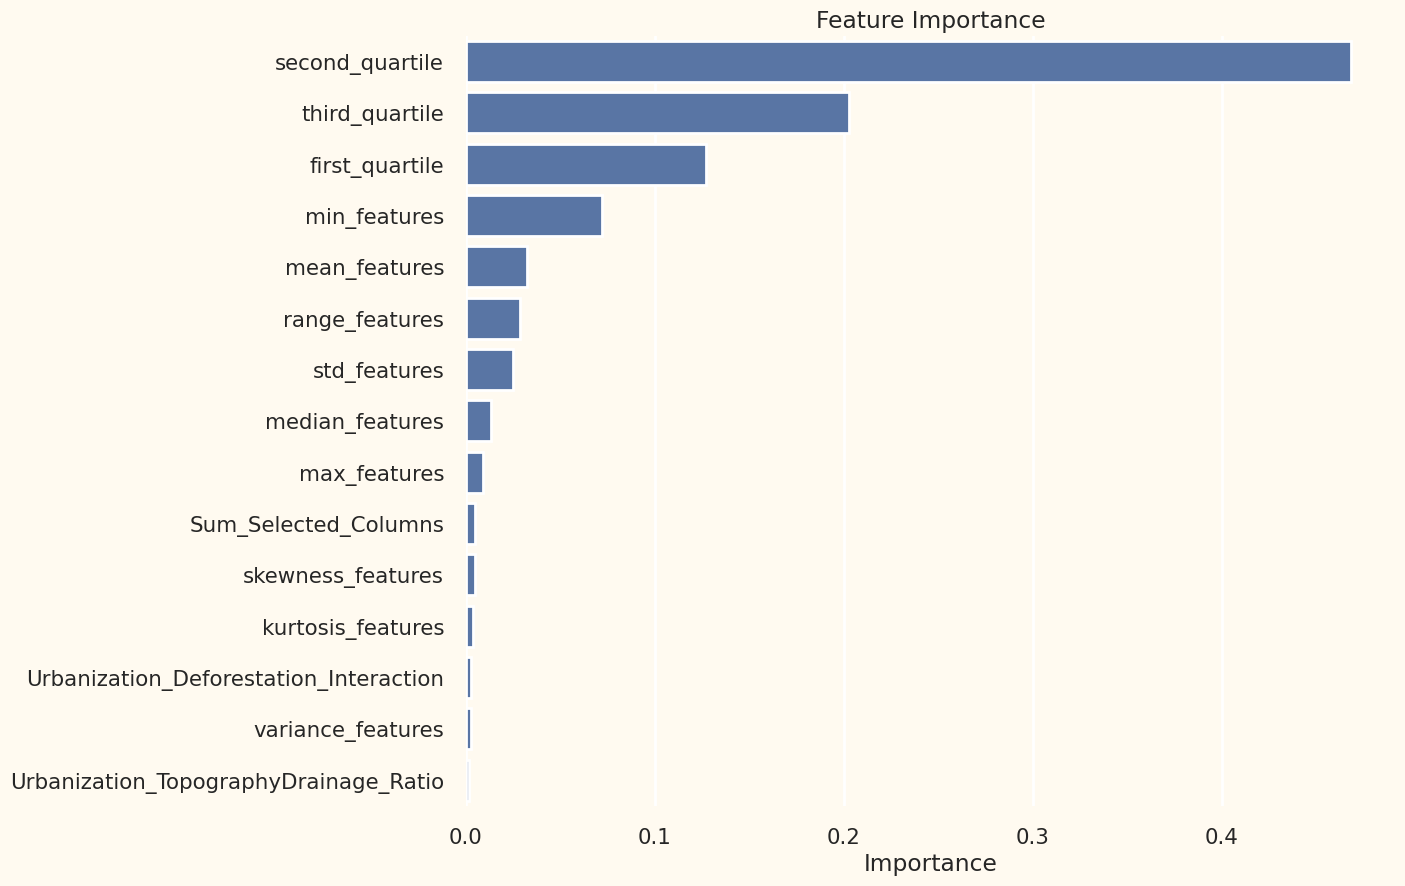

In [77]:
# feature importances
feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='5.3'></a>
# Voting Regressor

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [78]:
lgbm_model = LGBMRegressor()
catboost_model = CatBoostRegressor()

In [79]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Create a voting ensemble model (default voting method is averaging)
ensemble_model = VotingRegressor(
    estimators=[
        ('xgboost', xgb_model),
        ('lgbm', lgbm_model),
        ('catboost', catboost_model)
    ]
)

# Use cross-validation to evaluate the ensemble model with R² as the scoring parameter
r2_scores = cross_val_score(ensemble_model, x, y, cv=5, scoring='r2')

print("R² scores for each fold:", r2_scores)
print("Average R²:", r2_scores.mean())


Streaming output truncated to the last 5000 lines.
28:	learn: 0.0188247	total: 3.79s	remaining: 2m 6s
29:	learn: 0.0188065	total: 4s	remaining: 2m 9s
30:	learn: 0.0187860	total: 4.24s	remaining: 2m 12s
31:	learn: 0.0187734	total: 4.48s	remaining: 2m 15s
32:	learn: 0.0187613	total: 4.7s	remaining: 2m 17s
33:	learn: 0.0187486	total: 4.91s	remaining: 2m 19s
34:	learn: 0.0187362	total: 5.13s	remaining: 2m 21s
35:	learn: 0.0187266	total: 5.39s	remaining: 2m 24s
36:	learn: 0.0187187	total: 5.6s	remaining: 2m 25s
37:	learn: 0.0187113	total: 5.85s	remaining: 2m 28s
38:	learn: 0.0187022	total: 6.05s	remaining: 2m 29s
39:	learn: 0.0186967	total: 6.27s	remaining: 2m 30s
40:	learn: 0.0186915	total: 6.5s	remaining: 2m 32s
41:	learn: 0.0186859	total: 6.75s	remaining: 2m 34s
42:	learn: 0.0186795	total: 6.95s	remaining: 2m 34s
43:	learn: 0.0186751	total: 7.22s	remaining: 2m 36s
44:	learn: 0.0186698	total: 7.45s	remaining: 2m 38s
45:	learn: 0.0186661	total: 7.68s	remaining: 2m 39s
46:	learn: 0.0186640	

In [80]:
ensemble_model.fit(x,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1435
[LightGBM] [Info] Number of data points in the train set: 1117957, number of used features: 15
[LightGBM] [Info] Start training from score 0.504480
Learning rate set to 0.124117
0:	learn: 0.0458552	total: 383ms	remaining: 6m 22s
1:	learn: 0.0414130	total: 721ms	remaining: 5m 59s
2:	learn: 0.0375680	total: 1.04s	remaining: 5m 46s
3:	learn: 0.0343119	total: 1.22s	remaining: 5m 2s
4:	learn: 0.0315352	total: 1.39s	remaining: 4m 36s
5:	learn: 0.0292037	total: 1.55s	remaining: 4m 16s
6:	learn: 0.0272589	total: 1.72s	remaining: 4m 4s
7:	learn: 0.0256282	total: 1.88s	remaining: 3m 53s
8:	learn: 0.0243092	total: 2.04s	remaining: 3m 44s
9:	learn: 0.0232329	total: 2.2s	remaining: 3m 37s
10:	learn: 0.0223515	total: 2.36s	remaining: 3m 32s
11:

VotingRegressor(estimators=[('xgboost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.5971654266907475,
                                          device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0.007424095823836917,
                                          grow_policy=None,
                                          importance_type=None,
                                          interact...
                                          max_bin=None, max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=9,
                                          max_leaves=None, min_child_weight=0,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=913,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('lgbm', LGBMRegressor()),
                            ('catboost',
                             <catboost.core.CatBoostRegressor object at 0x78525d042710>)])

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='5.4'></a>
# Submission

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [81]:
y_pred = ensemble_model.predict(test_df)

In [83]:
df = pd.read_csv('/content/sample_submission.csv')

In [84]:
df['FloodProbability'] = y_pred

In [85]:
df

,id,FloodProbability
0,1117957,0.577057
1,1117958,0.456516
2,1117959,0.449898
3,1117960,0.469205
4,1117961,0.467085
...,...,...
745300,1863257,0.476390
745301,1863258,0.441630
745302,1863259,0.621812
745303,1863260,0.549774


In [86]:
df.to_csv("ensemble.csv", index=False)

<div style="color:white;padding: 30px;color:white;margin:30;font-size:120%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;background-position: 0px 0px;">
    <center>
    <h3><span style='color:white'>
        Thank you!</span></h3>
    </center>
</div>